In [13]:
from sklearn.datasets import load_iris
import pandas as pd

In [14]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

print(iris.DESCR)
print(iris.feature_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [17]:
y.isna().sum()

0

In [18]:
df = pd.concat([X, y], axis=1)

In [19]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

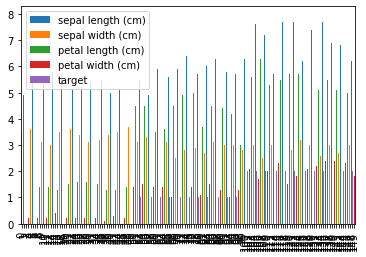

In [21]:
df.plot(kind ='bar')

In [23]:
import matplotlib.pyplot as plt

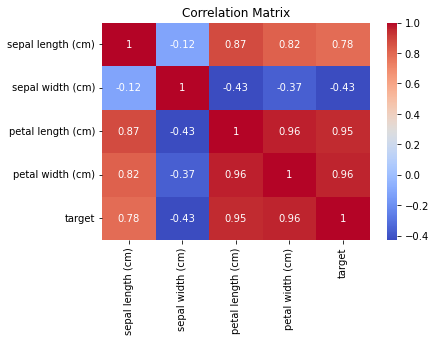

In [26]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()








In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
= iris.drop('species', axis=1)

In [28]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=column_names)

# Split the data into features (X) and target (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Standardize features (optional, but can improve some models)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define a list of classifiers
classifiers = [
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Logistic Regression', LogisticRegression())
]

# Evaluate each classifier using 5-fold cross-validation
results = []
for name, clf in classifiers:
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    results.append((name, scores.mean(), scores.std()))

# Print the results
for name, mean_score, std_score in results:
    print(f'{name}: Mean Accuracy = {mean_score:.2f}, Std Deviation = {std_score:.2f}')


K-Nearest Neighbors: Mean Accuracy = 0.96, Std Deviation = 0.02
Decision Tree: Mean Accuracy = 0.96, Std Deviation = 0.03
Random Forest: Mean Accuracy = 0.96, Std Deviation = 0.02
Support Vector Machine: Mean Accuracy = 0.97, Std Deviation = 0.02
Logistic Regression: Mean Accuracy = 0.96, Std Deviation = 0.04
